# Breast Cancer Diagnostic Prediction Program
## Purpose
Building a Machine Learning Model to Predict Tumor Benignity and Malignancy Based on the Wisconsin Breast Cancer Dataset (569 Samples, 30 Features)

## Technology Stack
- Python 3.8
- Main library: pandas, sklearn, matplotlib

## Key findings
| Indicator | Value |
|---|---|
| Accuracy | 96.5% |
| Optimal Feature | worst concave_points |

## Quick Use
```python
# Run for complete analysis
!python breast_cancer_analysis.py
```

> Data source：UCI Machine Learning Repository

First five lines: 
          id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  ar

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65292 (\N{FULLWIDTH COMMA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-

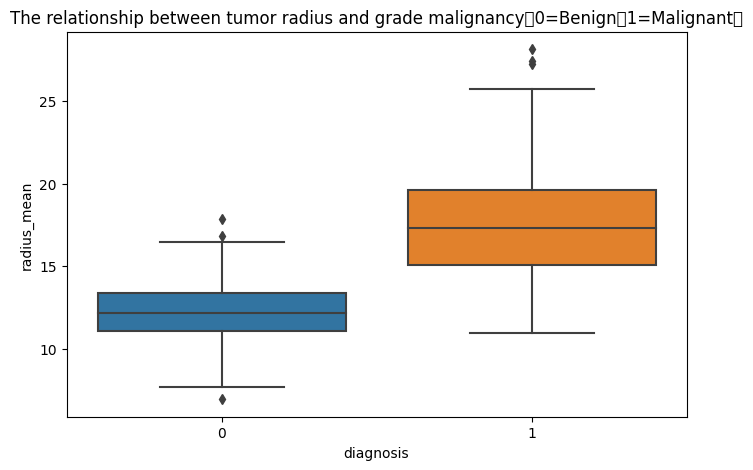

Model accuracy：96.49%

5 Most Important Features:
                  Feature  Importance
22       perimeter_worst    0.149617
23            area_worst    0.126899
27  concave points_worst    0.125992
7    concave points_mean    0.088654
20          radius_worst    0.072332


In [1]:
import pandas as pd
data = pd.read_csv("../input/breast-cancer-wisconsin-data/data.csv")
print("First five lines: \n", data.head())

# 1. 基础设置
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# 2. 数据加载与清洗
data = pd.read_csv("../input/breast-cancer-wisconsin-data/data.csv")
data = data.drop(['id', 'Unnamed: 32'], axis=1)  # 删除无用列
data['diagnosis'] = data['diagnosis'].map({'M':1, 'B':0})  # 转换标签

# 3. 可视化分析（运行后会显示图表）
plt.figure(figsize=(8,5))
sns.boxplot(x='diagnosis', y='radius_mean', data=data)
plt.title("The relationship between tumor radius and grade malignancy（0=Benign，1=Malignant）")
plt.show()

# 4. 构建预测模型
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestClassifier()
model.fit(X_train, y_train)
print(f"Model accuracy：{model.score(X_test, y_test):.2%}")

# 5. 特征重要性分析
importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)
print("\n5 Most Important Features:\n", importances.head())